<a href="https://colab.research.google.com/github/alcj17/PucRio/blob/main/mvp_analise_pedidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

#### Por: Antonio Lacerda de Castro Junior


## 1. Definição do Problema

  A companhia decidiu entender a distribuição de pedidos por data e seus status a partir de 01/08/2024 em todos os Centro de Distribuição, e neste primeiro ensaio visualizando apenas as quantidades de pedidos sem precisar ver os principais pontos de saídas de entregas.
  Seu objetivo é saber a curto prazo dentro um espaço de 30 dias se a volumetria de pedidos está em uma crescente, estável ou em queda, e seu compartamento dentro de um SLA logístico através de seus status.
  O Dataset é uma pequena fraça de dados dos pedidos diários compostos de de informações de data de criação, status, saída em roteiros, acompanhamento de suas etapas sofridas nas entregas até sua definição de concluído ou não e assim ver tempo de criação do pedido e encerramento.
  Seus atributos são capazes de mostrar através de uma linha de tempo situações e mudanças do pedido e poder prever se existe algum ganho no processo de entrega.
  Neste contexto separamos uma pequena amostra de quase 1 milhão de registros.

## 2. Atributos

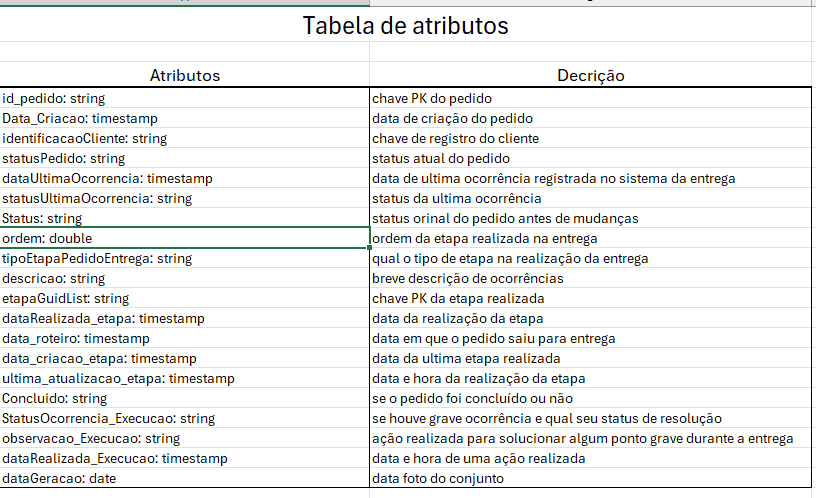

## Etapas do Projeto

## 3. Configurando o ambiente
primeiro passo é instalar o pyspark para poder realizar processamentos mais rápidos

In [1]:
# Instalando o pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


 Após a instalação do pyspark o drive será montado no google drive ond eestão as bases que serão usadas no projeto.

## 3.1 Preparando o ambiente spark
abaixo vamos criar uma sessão do spark para poder concentrar recursos e usar melhoro ambiente

In [2]:
# Importar a biblioteca drive
import pyspark
import pandas as pd
from google.colab import drive

from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

# Inicializa a sessão Spark
spark = SparkSession.builder \
    .appName("Importando Bases") \
    .getOrCreate()

## 3.2 Montando a conexão com o google drive

Aqui vamos buscar as bases no google drive realizando a montagem através da biblioteca já carregada anteriormente - google.colab

In [3]:
# Montar o Google Drive
drive.mount('/content/drive')

# Definindo caminho da base de Pedidos
file_path = '/content/drive/My Drive/mvp/bases/base_pedido.csv'

# o link acima é de acesso público , abaixo segue link original
# https://drive.google.com/drive/folders/1BC-uXOhjgJoPpJf8YQ15rEZqUDIVY5IJ?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.3 Lendo e carregando os dados em um dataframe pyspark

In [4]:
# Carregar o arquivo CSV em um DataFrame PySpark
df_pedidos = spark.read.csv(file_path, header=True, inferSchema=True, sep=";")

## 3.4 Verificando a volumetria da análise

In [5]:
# analisando qual a volumteria que tem na massa de análise
print("total> "+str(df_pedidos.count()))

total> 956209


## 3.5 Verificando os tipos de dados através do schema

In [6]:
df_pedidos.printSchema()

root
 |-- id_pedido: string (nullable = true)
 |-- Data_Criacao: timestamp (nullable = true)
 |-- identificacaoCliente: string (nullable = true)
 |-- statusPedido: string (nullable = true)
 |-- dataUltimaOcorrencia: timestamp (nullable = true)
 |-- statusUltimaOcorrencia: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- ordem: double (nullable = true)
 |-- tipoEtapaPedidoEntrega: string (nullable = true)
 |-- descricao: string (nullable = true)
 |-- etapaGuidList: string (nullable = true)
 |-- dataRealizada_etapa: timestamp (nullable = true)
 |-- data_roteiro: timestamp (nullable = true)
 |-- data_criacao_etapa: timestamp (nullable = true)
 |-- ultima_atualizacao_etapa: timestamp (nullable = true)
 |-- Concluido: string (nullable = true)
 |-- StatusOcorrencia_Execucao: string (nullable = true)
 |-- observacao_Execucao: string (nullable = true)
 |-- dataRealizada_Execucao: timestamp (nullable = true)
 |-- dataGeracao: date (nullable = true)



Reduzindo a massa para entender os dados contidos para análise com base na coluna de data que vou usar na minha análise.

In [7]:
# Exibir as primeiras linhas do resultado
df_pedidos = df_pedidos.filter(col("Data_Criacao")>="2024-08-01")

## 3.6 Convertendo para o Pandas

In [8]:
# verificando se o filtro foi eficiente mostrando as datas mínima e máxima dentro do dataframe
min_date = df_pedidos.agg(F.min("Data_Criacao")).collect()[0][0]
max_date = df_pedidos.agg(F.max("Data_Criacao")).collect()[0][0]

print("Data mínima:", min_date)
print("Data máxima:", max_date)

# particionando o dataframe para a conversão ser mais rápida
df_Spark = df_pedidos.repartition(20)

# convertendo para o Pandas
df_pandas = df_Spark.toPandas()

Data mínima: 2024-08-04 00:00:00
Data máxima: 2024-09-02 17:43:57


## 3.7 Analisando meus Dados e metadados com o Pandas

In [9]:
# verificando o uso de memória por coluna em sua massa bruta
memory_usage_per_column = df_pandas.memory_usage(deep=True)
print(memory_usage_per_column)

# analisando minhas colunas e seus tipos
df_pandas.info()

Index                             128
id_pedido                    77457204
Data_Criacao                  7648432
identificacaoCliente         64689475
statusPedido                 62681753
dataUltimaOcorrencia          7648432
statusUltimaOcorrencia       49735451
Status                       49532379
ordem                         7648432
tipoEtapaPedidoEntrega       61458608
descricao                    25837346
etapaGuidList                64275745
dataRealizada_etapa           7648432
data_roteiro                  7648432
data_criacao_etapa            7648432
ultima_atualizacao_etapa      7648432
Concluido                    51172872
StatusOcorrencia_Execucao    49737494
observacao_Execucao          66369076
dataRealizada_Execucao        7648432
dataGeracao                  38220784
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956054 entries, 0 to 956053
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------   

## 4 Preparação dos Dados:
Reduzir o uso de memória e ajustar os tipos de dados para iniciar a análise.

1 - Os campos de datas estão como Object,
 então preciso converter para date mesmo que seu dados já estejam em formato de data

In [10]:
# convertendo as colunas data que estão como object
df_pandas['dataGeracao'] = pd.to_datetime(df_pandas['dataGeracao'])

2 - Agora vamos converter todas as colunas que estão como Object e não pertencem a outro tipo de dado

In [11]:
# usando um for para percorrer todas as colunas e ajustar os tipos para Category e assim economizar memória
for col in df_pandas.select_dtypes(include='object').columns:
    df_pandas[col] = df_pandas[col].astype('category')

# as colunas id_pedido e identificacaoCliente ficaram como object pois serão descartadas em breve
# convertendo de volta as colunas que serão expurgadas da análise
df_pandas['id_pedido'] = df_pandas['id_pedido'].astype('object')
df_pandas['identificacaoCliente'] = df_pandas['identificacaoCliente'].astype('object')

# removendo as colunas que não serão usadas
df_pandas = df_pandas.drop(columns=['id_pedido', 'identificacaoCliente'])

3 - Agora vamos observar o ganho de perfomance para realização da análise.

In [12]:
memory_usage_per_column = df_pandas.memory_usage(deep=True)
print(memory_usage_per_column)

df_pandas.info()

# observe no resultado e compare com o outro de verificação de uso de memória acima
# e vai ver que houveram grandes ganhos inclusive no uso de memória no geral que caiu quase 50%

Index                            128
Data_Criacao                 7648432
statusPedido                  958041
dataUltimaOcorrencia         7648432
statusUltimaOcorrencia        958149
Status                        956910
ordem                        7648432
tipoEtapaPedidoEntrega        957031
descricao                    2066031
etapaGuidList                3697651
dataRealizada_etapa          7648432
data_roteiro                 7648432
data_criacao_etapa           7648432
ultima_atualizacao_etapa     7648432
Concluido                     956306
StatusOcorrencia_Execucao     958372
observacao_Execucao          4924106
dataRealizada_Execucao       7648432
dataGeracao                  7648432
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956054 entries, 0 to 956053
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Data_Criacao               956054 non-nu

In [13]:
# volumetria por colunas
df_pandas.count()


,0
Data_Criacao,956054
statusPedido,955386
dataUltimaOcorrencia,648283
statusUltimaOcorrencia,648283
Status,648283
ordem,737718
tipoEtapaPedidoEntrega,737718
descricao,44439
etapaGuidList,737718
dataRealizada_etapa,670385


In [14]:
# sumário estatístico
df_pandas.describe()

,Data_Criacao,dataUltimaOcorrencia,ordem,dataRealizada_etapa,data_roteiro,data_criacao_etapa,ultima_atualizacao_etapa,dataRealizada_Execucao,dataGeracao
count,956054,648283,737718.000000,670385,737718,737718,737718,646454,954718
mean,2024-08-16 23:11:42.458753024,2024-08-19 03:07:30.897075200,3.261181,2024-08-18 21:52:06.376154880,2024-08-19 20:34:02.250062848,2024-08-18 00:42:39.655908608,2024-08-19 20:59:58.085182976,2024-08-18 22:16:00.928094464,2024-09-03 00:00:00.000000512
min,2024-08-04 00:00:00,2024-07-13 12:00:00,1.000000,2024-07-13 12:00:00,2024-08-04 11:05:10.937000,2024-08-04 04:26:25.358000,2024-08-04 11:05:10.937000,2024-07-13 09:00:00,2024-09-03 00:00:00
25%,2024-08-09 00:00:00,2024-08-12 15:39:28,2.000000,2024-08-12 13:08:47,2024-08-12 13:51:44.952000,2024-08-09 20:20:26.889999872,2024-08-12 14:02:11.544249856,2024-08-12 12:13:53.249999872,2024-09-03 00:00:00
50%,2024-08-16 00:00:00,2024-08-19 15:25:27,4.000000,2024-08-19 13:24:20,2024-08-20 10:15:26.148499968,2024-08-17 07:10:59.636499968,2024-08-20 10:28:00.163000064,2024-08-19 11:55:29,2024-09-03 00:00:00
75%,2024-08-23 00:00:00,2024-08-26 16:16:05.500000,4.000000,2024-08-26 15:02:27,2024-08-27 16:18:56.629250048,2024-08-25 14:12:43.181249792,2024-08-27 16:24:32.347750144,2024-08-26 12:28:11,2024-09-03 00:00:00
max,2024-09-02 17:43:57,2024-09-03 01:30:24,6.000000,2024-09-02 23:14:17.069000,2024-09-02 20:14:36.816000,2024-09-02 20:14:36.803000,2024-09-02 20:14:36.816000,2024-09-02 18:47:37,2024-09-03 00:00:00
std,NaN,NaN,0.978809,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# ordenando pela data de criação do pedido
df_pandas = df_pandas.sort_values(by='Data_Criacao')

## 4.1 Tratamento das colunas vazias ou nulas

In [16]:
# Primeria lista de colunas para ajustes
colunas_para_ajustar = ['statusPedido', 'statusUltimaOcorrencia', 'Status','StatusOcorrencia_Execucao']

# Adicionar a nova categoria 'SEM STATUS' em cada coluna, se ela for categórica
for coluna in colunas_para_ajustar:
    # Se a coluna for categórica, adicionar a categoria 'SEM STATUS' se ainda não estiver presente
    if df_pandas[coluna].dtype.name == 'category':
        if 'SEM STATUS' not in df_pandas[coluna].cat.categories:
            df_pandas[coluna] = df_pandas[coluna].cat.add_categories('SEM STATUS')

    # Substituindo valores nulos ou vazios por 'SEM STATUS'
    df_pandas[coluna] = df_pandas[coluna].replace('', None)
    df_pandas[coluna] = df_pandas[coluna].fillna('SEM STATUS')

# Segunda lista de colunas para ajustes
colunas_para_ajustar = ['tipoEtapaPedidoEntrega', 'descricao', 'etapaGuidList','Concluido','observacao_Execucao']

# Adicionar a nova categoria 'SEM STATUS' em cada coluna, se ela for categórica
for coluna in colunas_para_ajustar:
    # Se a coluna for categórica, adicionar a categoria 'NÃO INFORMADO' se ainda não estiver presente
    if df_pandas[coluna].dtype.name == 'category':
        if 'NÃO INFORMADO' not in df_pandas[coluna].cat.categories:
            df_pandas[coluna] = df_pandas[coluna].cat.add_categories('NÃO INFORMADO')

    # Substituir valores nulos ou vazios por 'NÃO INFORMADO'
    df_pandas[coluna] = df_pandas[coluna].replace('', None)
    df_pandas[coluna] = df_pandas[coluna].fillna('NÃO INFORMADO')

# Lista de colunas de data que precisam ser preenchidas
colunas_data = ['dataUltimaOcorrencia', 'dataRealizada_etapa', 'ultima_atualizacao_etapa', 'dataRealizada_Execucao','data_roteiro','data_criacao_etapa']

# Preencher as colunas de data com os valores da coluna 'Data_Criacao' onde houver valores nulos
for coluna in colunas_data:
    df_pandas[coluna] = df_pandas[coluna].fillna(df_pandas['Data_Criacao'])

# Ajustando todos os valores da coluna 'Concluido' para letras maiúsculas
df_pandas['Concluido'] = df_pandas['Concluido'].str.upper()

# Preencher valores NaN com 0 o campo Ordem
df_pandas['ordem'] = df_pandas['ordem'].fillna(0)

# Converter a coluna 'ordem' para int
df_pandas['ordem'] = df_pandas['ordem'].astype(int)

# Verificar o dataframe
display(df_pandas)


,Data_Criacao,statusPedido,dataUltimaOcorrencia,statusUltimaOcorrencia,Status,ordem,tipoEtapaPedidoEntrega,descricao,etapaGuidList,dataRealizada_etapa,data_roteiro,data_criacao_etapa,ultima_atualizacao_etapa,Concluido,StatusOcorrencia_Execucao,observacao_Execucao,dataRealizada_Execucao,dataGeracao
187946,2024-08-04 00:00:00,ENTREGUE,2024-08-05 14:49:06.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 14:49:06.000,2024-08-05 11:49:08.801,2024-08-04 14:12:30.221,2024-08-05 11:49:08.801,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 11:49:06.000,2024-09-03
144591,2024-08-04 00:00:00,ENTREGUE,2024-08-05 13:14:24.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 13:14:24.000,2024-08-05 10:14:26.168,2024-08-04 16:12:59.727,2024-08-05 10:14:26.168,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 10:14:24.000,2024-09-03
236890,2024-08-04 00:00:00,ENTREGUE,2024-08-05 15:15:31.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 15:15:31.000,2024-08-05 12:15:32.482,2024-08-04 12:07:50.507,2024-08-05 12:15:32.482,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 12:15:31.000,2024-09-03
840745,2024-08-04 00:00:00,ENTREGUE,2024-08-07 15:43:18.087,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-07 15:43:18.087,2024-08-07 12:43:18.091,2024-08-04 16:11:23.065,2024-08-07 12:43:18.091,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-07 12:43:18.087,2024-09-03
627739,2024-08-04 00:00:00,ENTREGUE,2024-08-06 23:44:55.388,ENTREGUE,ENTREGUE,2,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-06 23:44:55.388,2024-08-06 20:44:55.394,2024-08-04 09:41:15.180,2024-08-06 20:44:55.394,SIM,ENTREGUE,Entregue,2024-08-06 20:44:55.388,2024-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716938,2024-09-02 14:20:52,SEM STATUS,2024-09-02 14:20:52.000,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 14:20:52.000,2024-09-02 14:20:52.000,2024-09-02 14:20:52.000,2024-09-02 14:20:52.000,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 14:20:52.000,NaT
339197,2024-09-02 14:40:26,SEM STATUS,2024-09-02 14:40:26.000,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 14:40:26.000,2024-09-02 14:40:26.000,2024-09-02 14:40:26.000,2024-09-02 14:40:26.000,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 14:40:26.000,NaT
1756,2024-09-02 16:29:22,SEM STATUS,2024-09-02 16:29:22.000,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 16:29:22.000,2024-09-02 16:29:22.000,2024-09-02 16:29:22.000,2024-09-02 16:29:22.000,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 16:29:22.000,NaT
155450,2024-09-02 16:59:56,SEM STATUS,2024-09-02 16:59:56.000,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 16:59:56.000,2024-09-02 16:59:56.000,2024-09-02 16:59:56.000,2024-09-02 16:59:56.000,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 16:59:56.000,NaT


# 5 Analisando Dados

In [18]:
# mostrando dimensões do dataset
print(df_pandas.shape)

(956054, 18)


In [20]:
# informações do conjunto
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 956054 entries, 187946 to 153760
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Data_Criacao               956054 non-null  datetime64[ns]
 1   statusPedido               956054 non-null  category      
 2   dataUltimaOcorrencia       956054 non-null  datetime64[ns]
 3   statusUltimaOcorrencia     956054 non-null  category      
 4   Status                     956054 non-null  category      
 5   ordem                      956054 non-null  int64         
 6   tipoEtapaPedidoEntrega     956054 non-null  category      
 7   descricao                  956054 non-null  category      
 8   etapaGuidList              956054 non-null  category      
 9   dataRealizada_etapa        956054 non-null  datetime64[ns]
 10  data_roteiro               956054 non-null  datetime64[ns]
 11  data_criacao_etapa         956054 non-null  datetime

In [23]:
# mostrando as 5 primeiras linhas
df_pandas.head(5)

,Data_Criacao,statusPedido,dataUltimaOcorrencia,statusUltimaOcorrencia,Status,ordem,tipoEtapaPedidoEntrega,descricao,etapaGuidList,dataRealizada_etapa,data_roteiro,data_criacao_etapa,ultima_atualizacao_etapa,Concluido,StatusOcorrencia_Execucao,observacao_Execucao,dataRealizada_Execucao,dataGeracao
187946,2024-08-04,ENTREGUE,2024-08-05 14:49:06.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 14:49:06.000,2024-08-05 11:49:08.801,2024-08-04 14:12:30.221,2024-08-05 11:49:08.801,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 11:49:06.000,2024-09-03
144591,2024-08-04,ENTREGUE,2024-08-05 13:14:24.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 13:14:24.000,2024-08-05 10:14:26.168,2024-08-04 16:12:59.727,2024-08-05 10:14:26.168,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 10:14:24.000,2024-09-03
236890,2024-08-04,ENTREGUE,2024-08-05 15:15:31.000,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-05 15:15:31.000,2024-08-05 12:15:32.482,2024-08-04 12:07:50.507,2024-08-05 12:15:32.482,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-05 12:15:31.000,2024-09-03
840745,2024-08-04,ENTREGUE,2024-08-07 15:43:18.087,ENTREGUE,ENTREGUE,4,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-07 15:43:18.087,2024-08-07 12:43:18.091,2024-08-04 16:11:23.065,2024-08-07 12:43:18.091,SIM,ENTREGUE,SEM OBSERVAÇÕES,2024-08-07 12:43:18.087,2024-09-03
627739,2024-08-04,ENTREGUE,2024-08-06 23:44:55.388,ENTREGUE,ENTREGUE,2,ENTREGA_CONSUMIDOR,NÃO INFORMADO,SEM ETAPA PARA O PEDIDO,2024-08-06 23:44:55.388,2024-08-06 20:44:55.394,2024-08-04 09:41:15.180,2024-08-06 20:44:55.394,SIM,ENTREGUE,Entregue,2024-08-06 20:44:55.388,2024-09-03


In [24]:
# mostrando as 5 ultimas linhas
df_pandas.tail(5)

,Data_Criacao,statusPedido,dataUltimaOcorrencia,statusUltimaOcorrencia,Status,ordem,tipoEtapaPedidoEntrega,descricao,etapaGuidList,dataRealizada_etapa,data_roteiro,data_criacao_etapa,ultima_atualizacao_etapa,Concluido,StatusOcorrencia_Execucao,observacao_Execucao,dataRealizada_Execucao,dataGeracao
716938,2024-09-02 14:20:52,SEM STATUS,2024-09-02 14:20:52,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 14:20:52,2024-09-02 14:20:52,2024-09-02 14:20:52,2024-09-02 14:20:52,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 14:20:52,NaT
339197,2024-09-02 14:40:26,SEM STATUS,2024-09-02 14:40:26,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 14:40:26,2024-09-02 14:40:26,2024-09-02 14:40:26,2024-09-02 14:40:26,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 14:40:26,NaT
1756,2024-09-02 16:29:22,SEM STATUS,2024-09-02 16:29:22,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 16:29:22,2024-09-02 16:29:22,2024-09-02 16:29:22,2024-09-02 16:29:22,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 16:29:22,NaT
155450,2024-09-02 16:59:56,SEM STATUS,2024-09-02 16:59:56,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 16:59:56,2024-09-02 16:59:56,2024-09-02 16:59:56,2024-09-02 16:59:56,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 16:59:56,NaT
153760,2024-09-02 17:43:57,SEM STATUS,2024-09-02 17:43:57,SEM STATUS,SEM STATUS,0,NÃO INFORMADO,NÃO INFORMADO,NÃO INFORMADO,2024-09-02 17:43:57,2024-09-02 17:43:57,2024-09-02 17:43:57,2024-09-02 17:43:57,NÃO INFORMADO,SEM STATUS,NÃO INFORMADO,2024-09-02 17:43:57,NaT
